In [27]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt



In [28]:
df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")


In [29]:
# Removendo colunas de não interesse:

columns_to_remove = ['Publisher', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']
df = df.drop(columns=columns_to_remove, axis=1)


In [30]:
# Renomeando as colunas:

df.rename(columns={
    'Name':'nome',
    'Platform': 'plataforma',
    'Year_of_Release': 'ano_do_release',
    'Genre': 'genero',
}, inplace=True)

df.head()

,nome,plataforma,ano_do_release,genero,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37


In [43]:
# Removendo possíveis valores ausentes:

df.dropna(subset=['ano_do_release', 'Global_Sales'], inplace=True)

# Preenchendo eles com uma média do valor da coluna:

media = df['ano_do_release'].mean()
df['ano_do_release'].fillna(media, inplace=True)


# Declarando variáveis independentes (X) e dependentes (y)
X = df[['ano_do_release']]
y = df['Global_Sales']


modelo = LinearRegression()
modelo.fit(X, y)

previsao = modelo.predict(X)

print(previsao)


[0.5461261  0.97161222 0.50560362 ... 0.34351367 0.60690983 0.34351367]


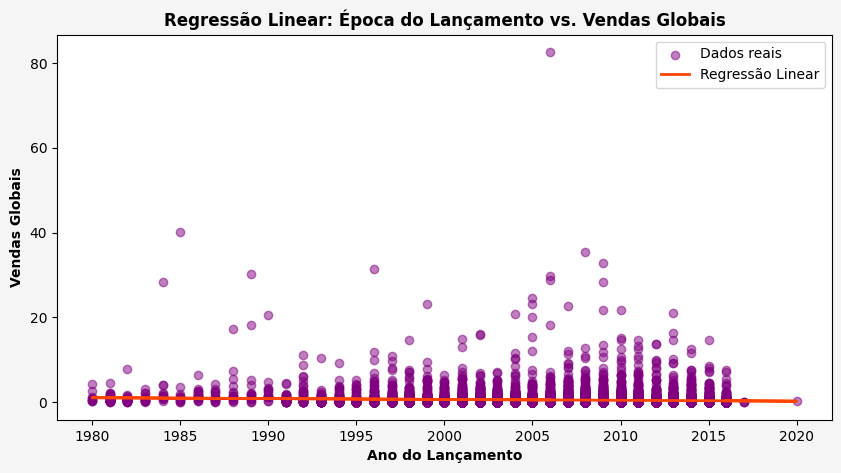

In [42]:
# Scatter plot
plt.figure(facecolor='whitesmoke', figsize=(10, 5)) 
plt.scatter(X, y, color='purple', alpha=0.5, label='Dados reais')

# Linha da regressão
plt.plot(X, previsao, color='orangered', linewidth=2, label='Regressão Linear')

# Configurações adicionais
plt.xlabel('Ano do Lançamento',fontweight='bold')
plt.ylabel('Vendas Globais', fontweight='bold')
plt.title('Regressão Linear: Época do Lançamento vs. Vendas Globais', fontweight='bold')  # Título em negrito
plt.legend()


# Exibir o plot
plt.show()